## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [4]:
# Study data files
mouse_metadata_path = "../../gt-atl-data-pt-03-2020-u-c/05-Matplotlib/Homework/pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../../gt-atl-data-pt-03-2020-u-c/05-Matplotlib/Homework/pymaceuticals/data/Study_results.csv"

In [5]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [6]:
# Combine the data into a single dataset
merged_files  = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_files

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the DataFrame.
Numberofmice = merged_files["Mouse ID"].nunique()
Numberofmice 

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicatemice = merged_files.duplicated(["Mouse ID","Timepoint"])
duplicatemice = merged_files[merged_files.duplicated(["Mouse ID","Timepoint"])]
duplicatemice = duplicatemice["Mouse ID"].unique()
#duplicatemice = pd.DataFrame(duplicatemice["Mouse ID"].unique())
#duplicatemice = print(str(duplicatemice).strip('[]').strip("''"))
duplicatemice

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicatemice_data = merged_files.loc[merged_files["Mouse ID"] == duplicatemice
duplicatemice_data = merged_files.loc[merged_files["Mouse ID"].isin(duplicatemice)]
#duplicatemice_data = merged_files.loc[merged_files["Mouse ID"] == duplicatemice]
duplicatemice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleanfile = merged_files[merged_files["Mouse ID"].isin(duplicatemice) == False]
Cleanfile

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
Numberofmice_Cleanfile = Cleanfile["Mouse ID"].nunique()
Numberofmice_Cleanfile

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

Groupedfile = Cleanfile.groupby(["Drug Regimen"])
tumorvol_mean = Groupedfile["Tumor Volume (mm3)"].mean()
tumorvol_median = Groupedfile["Tumor Volume (mm3)"].median()
tumorvol_var = Groupedfile["Tumor Volume (mm3)"].var()
tumorvol_std = Groupedfile["Tumor Volume (mm3)"].std()
tumorvol_sem = Groupedfile["Tumor Volume (mm3)"].sem()

pd.DataFrame({"Mean": tumorvol_mean,
                "Median": tumorvol_median,
                 "variance": tumorvol_var,
                 "standard deviation": tumorvol_std,
                 "SEM": tumorvol_sem})

,Mean,Median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

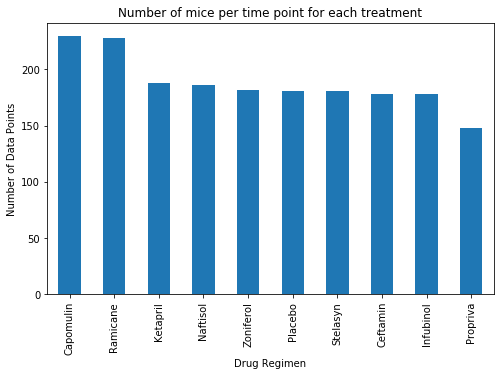

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

mice_timepoint = Cleanfile[["Mouse ID","Drug Regimen"]]
mice_timepoint = pd.DataFrame(mice_timepoint.groupby(["Drug Regimen"])["Mouse ID"].count()).sort_values(["Mouse ID"], ascending=False)
mice_timepoint
mice_timepoint.plot(kind="bar", legend=None, figsize=(8,5))
plt.title("Number of mice per time point for each treatment")
plt.ylabel("Number of Data Points")

plt.show()
plt.tight_layout()

In [15]:
mice_timepoint

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


Text(0, 0.5, 'Number of Data Points')

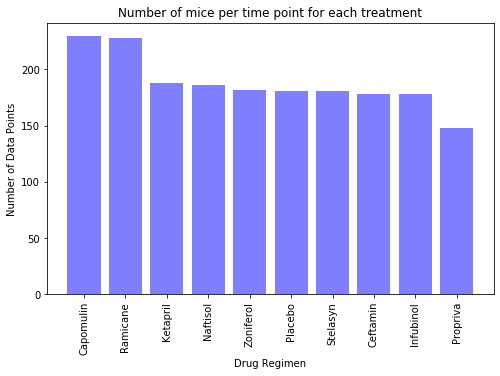

In [16]:
mice_timepoint = mice_timepoint.reset_index()
x_axis = np.arange(len(mice_timepoint))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,5))
plt.bar(x_axis, mice_timepoint["Mouse ID"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, mice_timepoint["Drug Regimen"], rotation="vertical")
plt.xticks
plt.title("Number of mice per time point for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie Plots

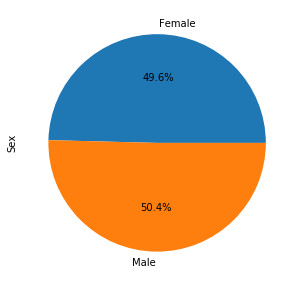

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_timepoint = Cleanfile[["Mouse ID","Sex"]]
mice_timepoint = pd.DataFrame(mice_timepoint.groupby(["Sex"])["Mouse ID"].nunique())
mice_timepoint.plot(kind="pie", autopct='%1.1f%%', y= "Mouse ID", figsize=(5,5))
plt.ylabel("Sex")
plt.legend().set_visible(False)

Text(0, 0.5, 'Sex')

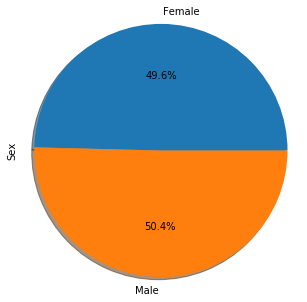

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_timepoint = mice_timepoint.reset_index()
plt.figure(figsize=(5,5))
plt.pie(mice_timepoint["Mouse ID"], labels=mice_timepoint["Sex"].to_list(), autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis("equal")
#plt.legend(mice_timepoint["Sex"], loc="upper right")
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Final tumor volume of each mouse across four of the most promising treatment regimens:
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
promising_treatment = Cleanfile[Cleanfile['Drug Regimen'].isin(treatment_regimens)]
Drug_bymice = promising_treatment.groupby(["Mouse ID"])["Drug Regimen"].unique().str[0]
Last_tumor = promising_treatment.groupby(["Mouse ID"])["Tumor Volume (mm3)"].last()
finaltumor_promising_treatment = pd.DataFrame({"Promising Treatment Regimen": Drug_bymice,
                                    "Final Tumor Volume (mm3)": Last_tumor})

In [20]:
Capomulin_info = finaltumor_promising_treatment.loc[finaltumor_promising_treatment["Promising Treatment Regimen"] == "Capomulin"]
Capomulin_outliers = Capomulin_info["Final Tumor Volume (mm3)"]
Capomulin_quartiles = Capomulin_outliers.quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq
Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)
Capomulin_outliers = Capomulin_outliers.loc[(Capomulin_outliers < Capomulin_lower_bound) + (Capomulin_outliers > Capomulin_upper_bound)]
print(f"Capomulin potential outliers: {Capomulin_outliers}")

Capomulin potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


C:\Users\Anita\AppData\Local\Continuum\anaconda3\envs\pythondata\lib\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [21]:
Ramicane_info = finaltumor_promising_treatment.loc[finaltumor_promising_treatment["Promising Treatment Regimen"] == "Ramicane"]
Ramicane_outliers = Ramicane_info["Final Tumor Volume (mm3)"]
Ramicane_quartiles = Ramicane_outliers.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq - Ramicane_lowerq
Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)
Ramicane_outliers = Ramicane_outliers.loc[(Ramicane_outliers < Ramicane_lower_bound) + (Ramicane_outliers > Ramicane_upper_bound)]
print(f"Ramicane potential outliers: {Ramicane_outliers}")

Ramicane potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


In [22]:
Infubinol_info = finaltumor_promising_treatment.loc[finaltumor_promising_treatment["Promising Treatment Regimen"] == "Infubinol"]
Infubinol_outliers = Infubinol_info["Final Tumor Volume (mm3)"]
Infubinol_quartiles = Infubinol_outliers.quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq - Infubinol_lowerq
Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)
Infubinol_outliers = Infubinol_outliers.loc[(Infubinol_outliers < Infubinol_lower_bound) + (Infubinol_outliers > Infubinol_upper_bound)]
print(f"Infubinol potential outliers: {Infubinol_outliers}")

Infubinol potential outliers: Mouse ID
c326    36.321346
Name: Final Tumor Volume (mm3), dtype: float64


In [23]:
Ceftamin_info = finaltumor_promising_treatment.loc[finaltumor_promising_treatment["Promising Treatment Regimen"] == "Ceftamin"]
Ceftamin_outliers = Ceftamin_info["Final Tumor Volume (mm3)"]
Ceftamin_quartiles = Ceftamin_outliers.quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq - Ceftamin_lowerq
Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)
Ceftamin_outliers = Ceftamin_outliers.loc[(Ceftamin_outliers < Ceftamin_lower_bound) + (Ceftamin_outliers > Ceftamin_upper_bound)]
print(f"Ceftamin potential outliers: {Ceftamin_outliers}")

Ceftamin potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

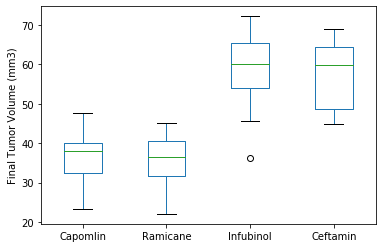

In [24]:
tumor_info = pd.DataFrame({"Capomlin": Capomulin_info["Final Tumor Volume (mm3)"],
                "Ramicane": Ramicane_info["Final Tumor Volume (mm3)"],
                 "Infubinol": Infubinol_info["Final Tumor Volume (mm3)"],
                 "Ceftamin": Ceftamin_info["Final Tumor Volume (mm3)"]})
tumor_box = tumor_info.plot.box()
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

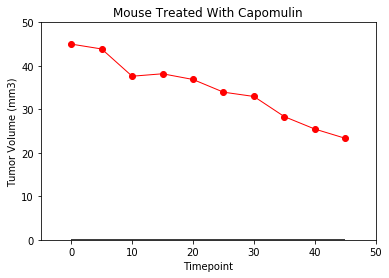

In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin = Cleanfile.loc[Cleanfile['Drug Regimen'] == "Capomulin"]
mice = Capomulin["Mouse ID"].iloc[0]
time_vs_tumor = Capomulin.loc[Capomulin['Mouse ID'] == mice]
x_lim = time_vs_tumor["Timepoint"].max()
y_lim = time_vs_tumor["Tumor Volume (mm3)"].max()
x_axis = time_vs_tumor["Timepoint"].to_list()
y_axis = time_vs_tumor["Tumor Volume (mm3)"].to_list()
plt.title("Mouse Treated With Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.hlines(0, 0, x_lim)
plt.xlim(-5, x_lim + 5)
plt.ylim(0, y_lim + 5)

plt.plot(x_axis, y_axis, marker="o", color="red", linewidth=1)
plt.show()

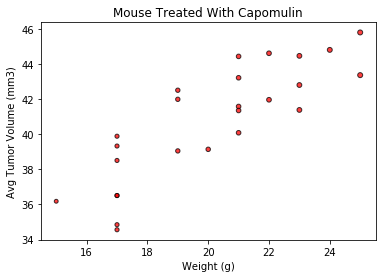

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Avg = Capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
weight = Capomulin.groupby(["Mouse ID"])["Weight (g)"].unique().str[0]#,"Weight (g)"]]
Avgtumor_weight = pd.DataFrame({"Weight (g)": weight,
                                    "Avg Tumor Volume (mm3)": Avg})
x_limit = Avgtumor_weight["Weight (g)"].max()
y_limit = Avgtumor_weight["Avg Tumor Volume (mm3)"].max()
x_axis = Avgtumor_weight["Weight (g)"].to_list()
y_axis = Avgtumor_weight["Avg Tumor Volume (mm3)"].to_list()
plt.title("Mouse Treated With Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
                          
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)
plt.show()

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Avgtumor_weight
weight_corr = Avgtumor_weight["Weight (g)"]
tomor_corr = Avgtumor_weight["Avg Tumor Volume (mm3)"]
correlation = st.pearsonr(weight_corr,tomor_corr)
print(f"The correlation coefficient between weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation coefficient between weight and average tumor volume for the Capomulin regimen is 0.84


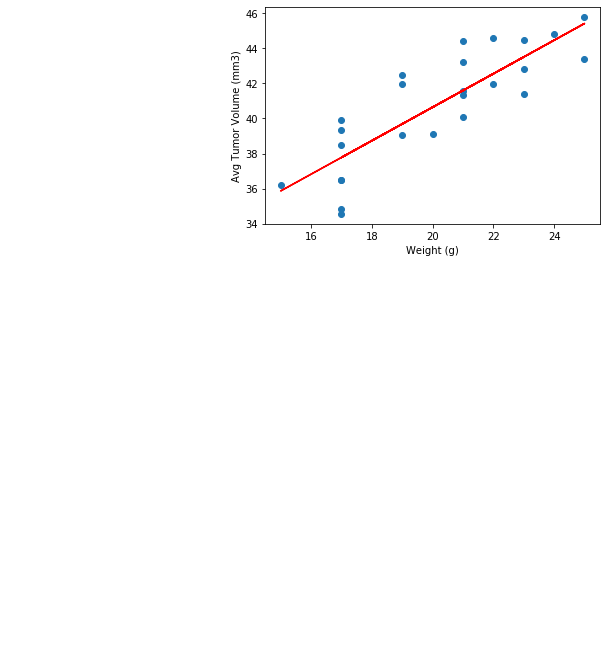

In [28]:
weight_reg = Avgtumor_weight["Weight (g)"]
tomur_reg = Avgtumor_weight["Avg Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_reg, tomur_reg)
regress_values = weight_reg * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_reg,tomur_reg)
plt.plot(weight_reg,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()